In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
sns.set(rc={'figure.figsize':(25,10)})

In [6]:
pd.set_option('display.max_rows', 1000)

In [7]:
df = pd.read_csv('data/Google_Stock_Price_Train.csv')

In [8]:
Volatility_group_labels = ['Low', 'Medium', 'High']

### Exploration data analysis

### * read about seaborn
1. boxplot
2. violenplot

##### Convert columns to float

In [9]:
for column in ['Close', 'Volume']:
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].astype(float)

##### Convert column to datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

##### Sort date field

In [11]:
##melody
df = df.sort_values(by='Date')

#### Extract day of week

In [12]:
df['day_of_week'] = df['Date'].dt.dayofweek

##### Extract Volatility feature

In [13]:
df['Volatility'] = df['High']-df['Low']

##### Extract Volatility group feature

In [14]:
df['Volatility_group'] = pd.qcut(df['Volatility'], q=3, labels=Volatility_group_labels)

In [15]:
df['Close_ma_5'] = df['Close'].rolling(5).mean()

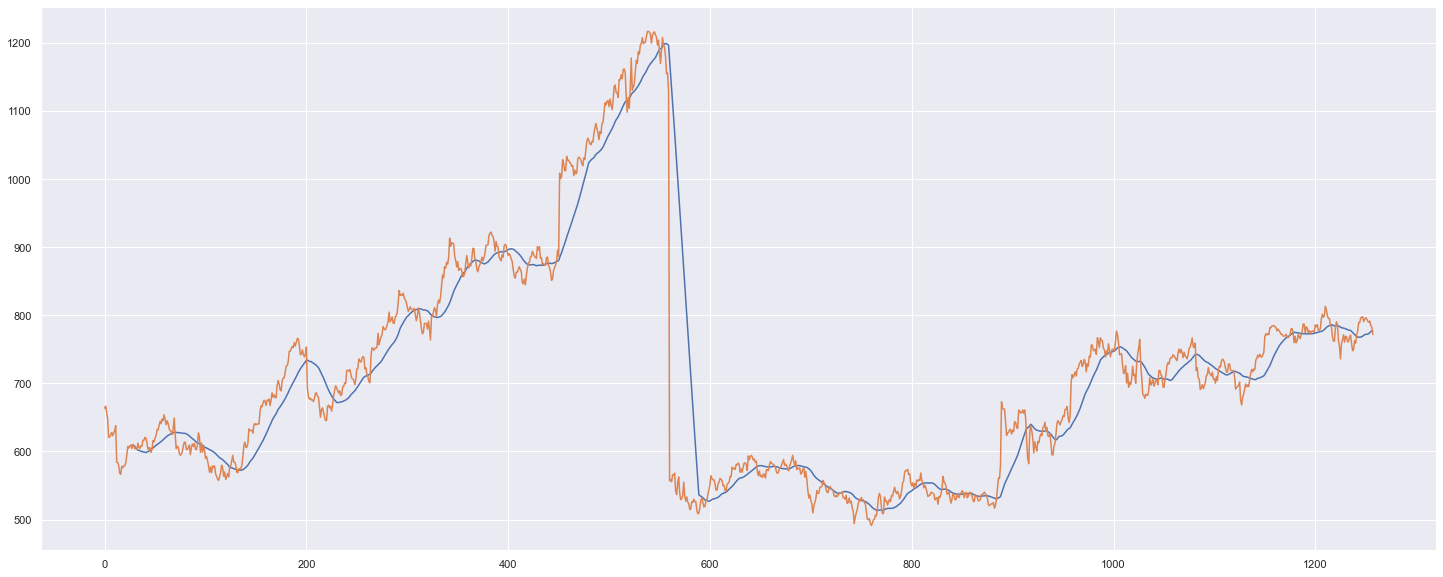

In [16]:
df['Close_ma'] = df['Close'].rolling(30).mean()
plt.plot(df['Close_ma'])
plt.plot(df['Close'])

In [17]:
df['Close_ma_diff'] = df['Close'] - df['Close_ma']

In [18]:
df['Is_close_below_ma'] = np.where(df['Close'] < df['Close_ma'], 1, 0)

In [19]:
df['Is_close_above_ma'] = np.where(df['Close'] < df['Close_ma'], 0, 1)

In [20]:
is_close_below_ma_cumsum = df['Is_close_below_ma'].cumsum()
df['Days_close_below_ma'] = is_close_below_ma_cumsum.sub(is_close_below_ma_cumsum.mask(df['Is_close_below_ma'] != 0).ffill(), fill_value=0).astype(int)

In [21]:
is_close_above_ma_cumsum = df['Is_close_above_ma'].cumsum()
df['Days_close_above_ma'] = is_close_above_ma_cumsum.sub(is_close_above_ma_cumsum.mask(df['Is_close_above_ma'] != 0).ffill(), fill_value=0).astype(int)

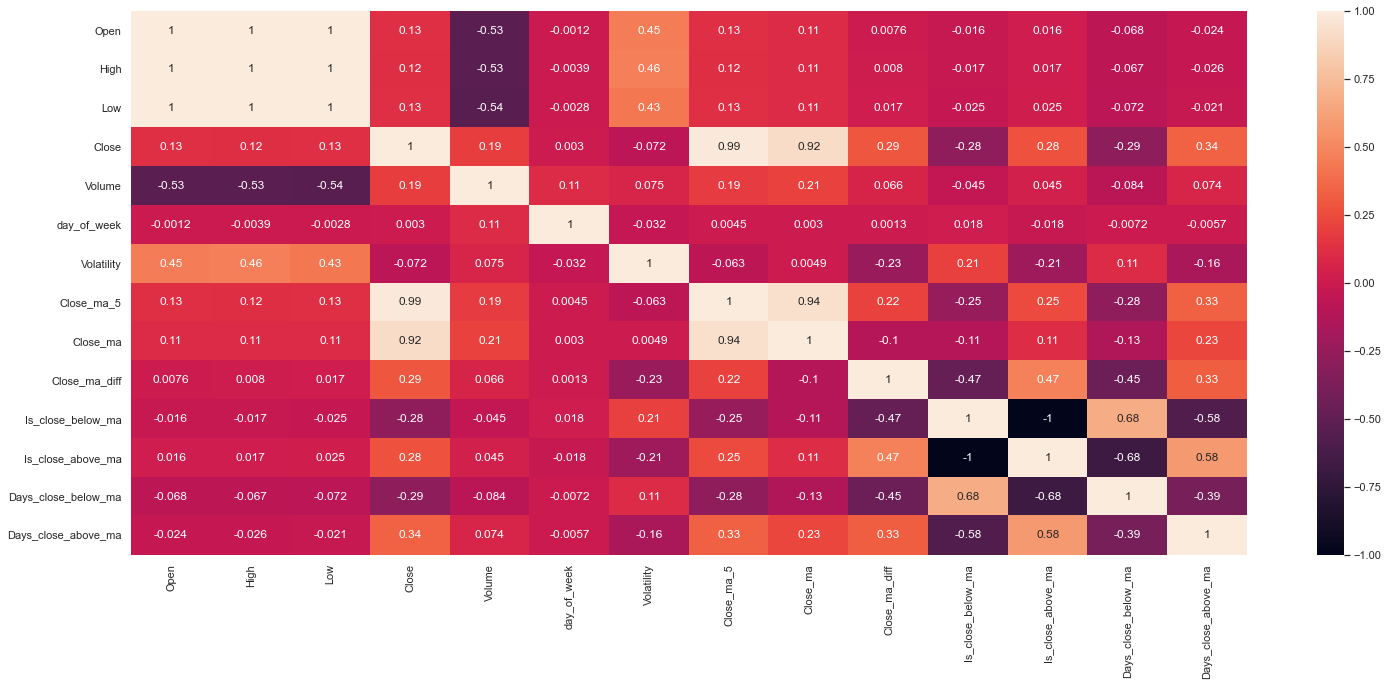

In [22]:
sns.heatmap(df.corr(), annot=True)

In [23]:
# df.drop(columns=['Days_above_below_ma'], axis=1, inplace=True)

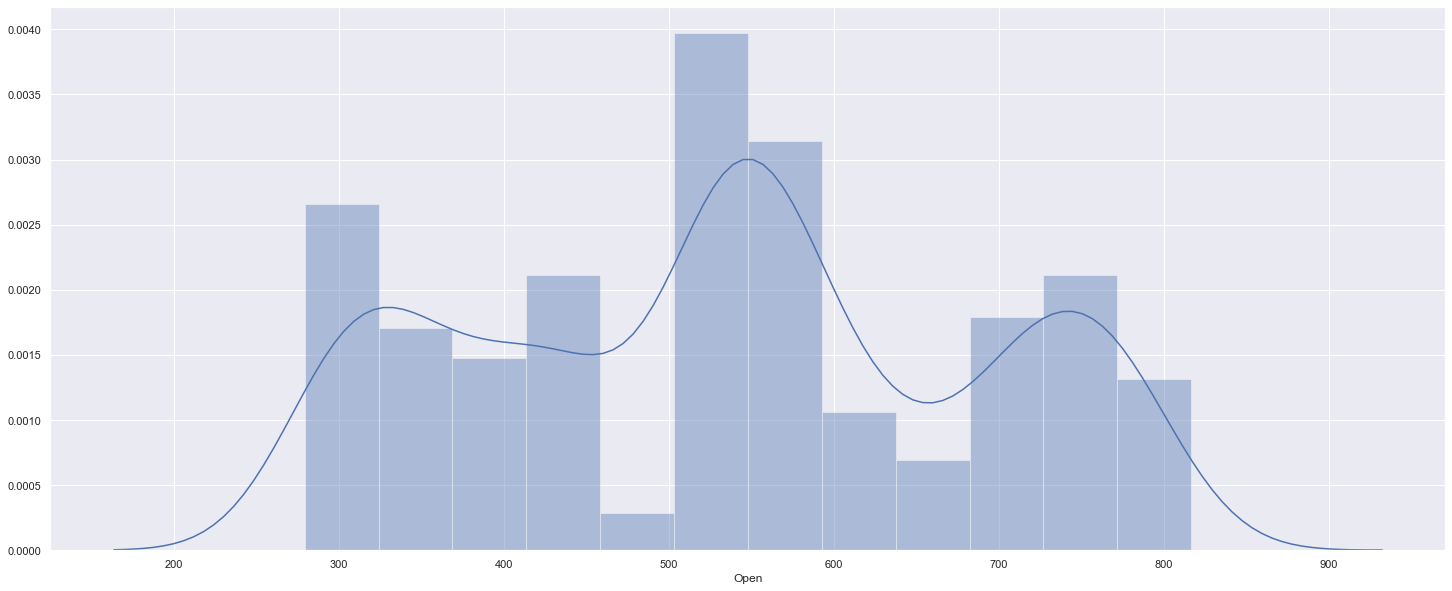

In [24]:
sns.distplot(df['Open'])

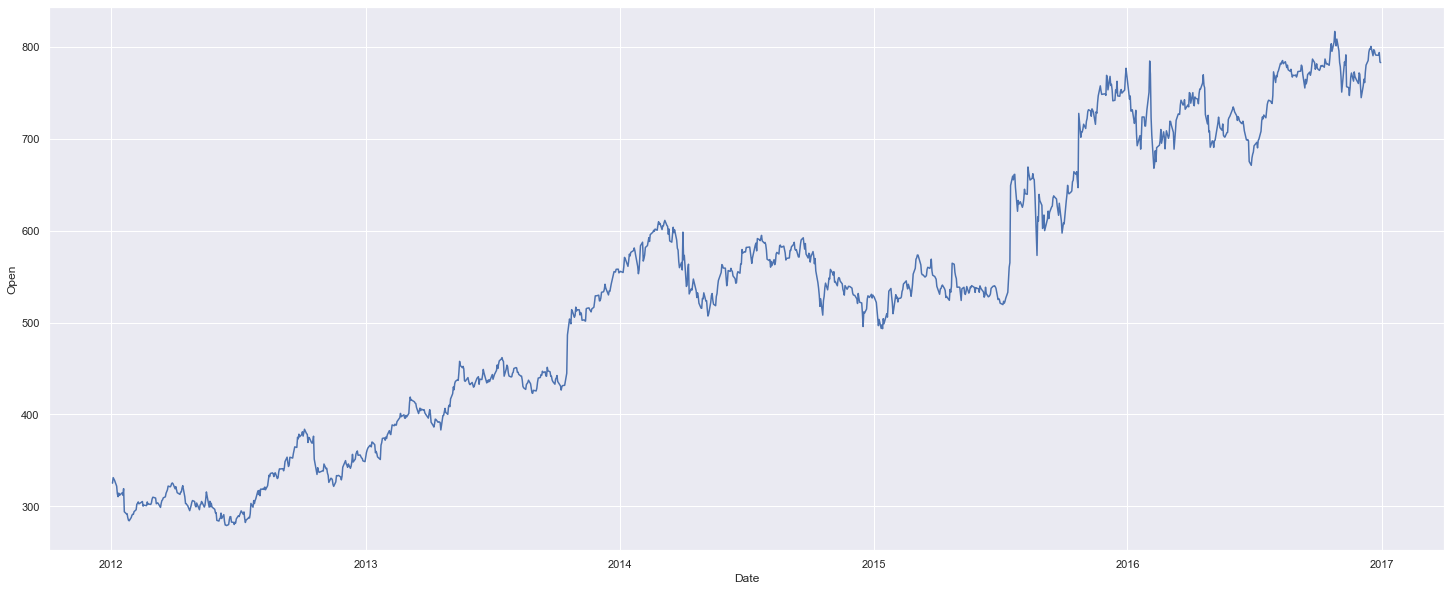

In [25]:
sns.lineplot(df['Date'], df['Open'])

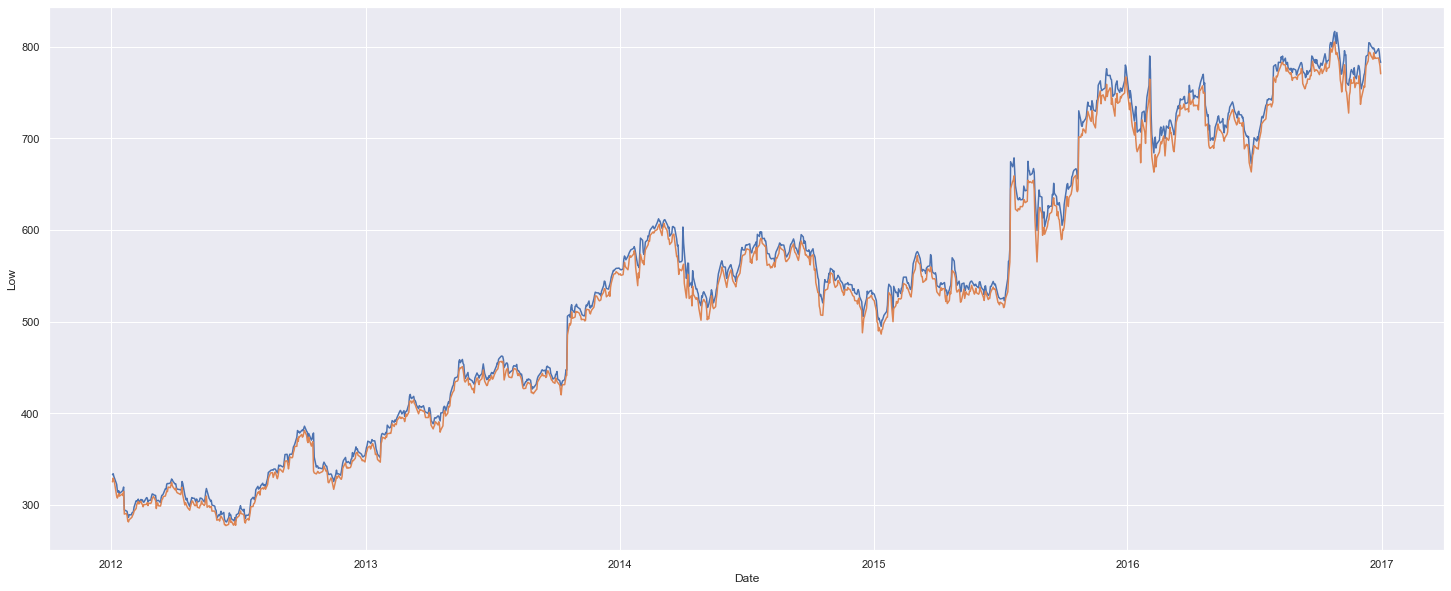

In [26]:
sns.lineplot(df['Date'], df['High'])
sns.lineplot(df['Date'], df['Low'])

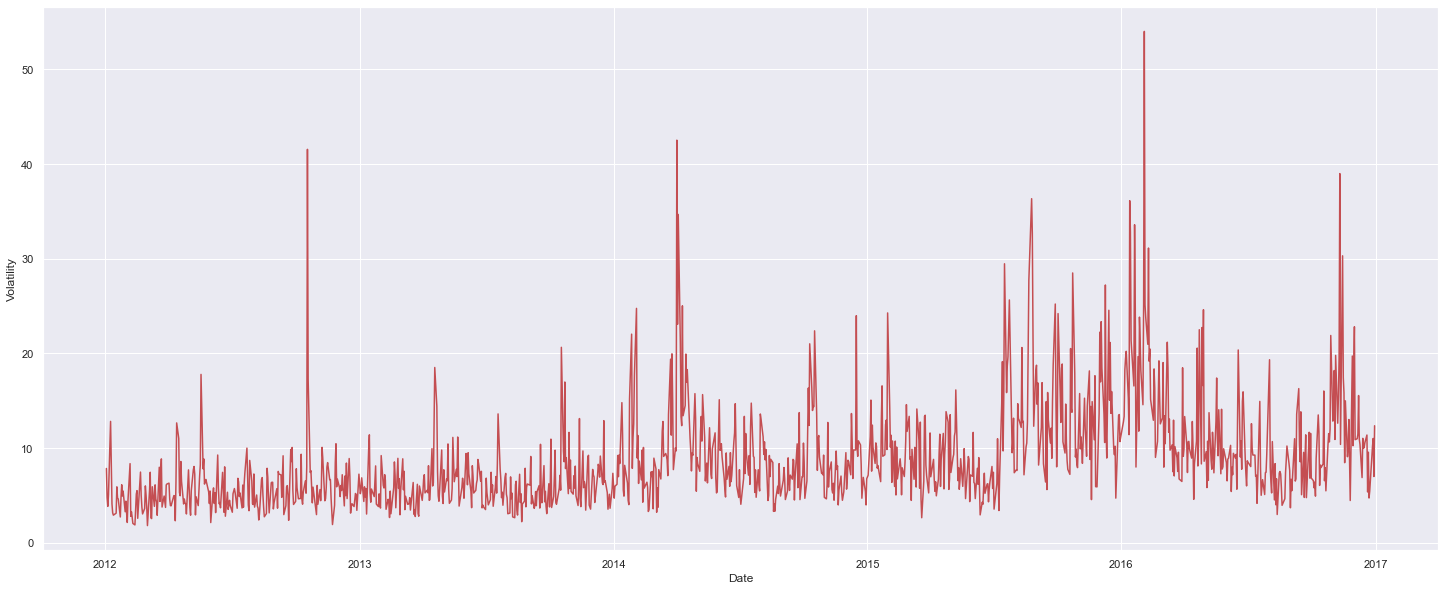

In [27]:
sns.lineplot(df['Date'], df['Volatility'],color='r')

In [31]:
df

,Date,Open,High,Low,Close,Volume,day_of_week,Volatility,Volatility_group,Close_ma_5,Close_ma,Close_ma_diff,Is_close_below_ma,Is_close_above_ma,Days_close_below_ma,Days_close_above_ma
0,2012-01-03,325.25,332.83,324.97,663.59,7380500.0,1,7.86,Medium,NaN,NaN,NaN,0,1,0,1
1,2012-01-04,331.27,333.87,329.08,666.45,5749400.0,2,4.79,Low,NaN,NaN,NaN,0,1,0,2
2,2012-01-05,329.83,330.75,326.89,657.21,6590300.0,3,3.86,Low,NaN,NaN,NaN,0,1,0,3
3,2012-01-06,328.34,328.77,323.68,648.24,5405900.0,4,5.09,Low,NaN,NaN,NaN,0,1,0,4
4,2012-01-09,322.04,322.29,309.46,620.76,11688800.0,0,12.83,High,651.250,NaN,NaN,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,623400.0,4,5.46,Low,793.270,773.216333,16.693667,0,1,0,13
1254,2016-12-27,790.68,797.86,787.66,791.55,789100.0,1,10.20,High,792.740,774.467333,17.082667,0,1,0,14
1255,2016-12-28,793.70,794.23,783.20,785.05,1153800.0,2,11.03,High,790.466,776.099667,8.950333,0,1,0,15
1256,2016-12-29,783.33,785.93,778.92,782.79,744300.0,3,7.01,Medium,788.112,776.909667,5.880333,0,1,0,16
